<a href="https://colab.research.google.com/github/Marcos9971/Controle/blob/main/PrimeirospassosnaOptiQuantumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.5 MB/s eta 0:00:00


MFscomp(s) = 
          30
----------------------
s^3 + 6 s^2 + 5 s + 30

MFcompP(s) = 
          30
----------------------
s^3 + 6 s^2 + 5 s + 30

MFcompPID(s) = 
           319.8 s^2 + 227.6 s + 18
----------------------------------------------
12.64 s^4 + 75.87 s^3 + 383 s^2 + 227.6 s + 18



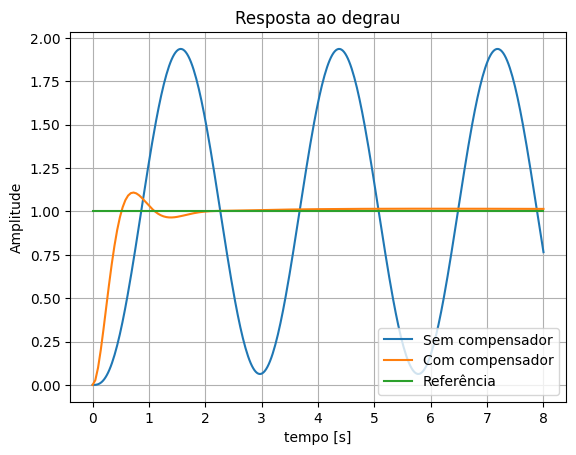

In [2]:
#Ziegler-Nichols para plantas de ordem maiores ou iguais a 2

import matplotlib.pyplot as plt
import numpy as np
import control

s = control.tf('s')

#Parâmetros obtidos pelo segundo método de Ziegler-Nichols para
#a planta 1/(s*(s+1)*(s+5))
Kcr = 1
Pcr = 2.81


#PID
Kp = 0.6*Kcr
Ti = 0.5*Pcr*9
Td = 0.125*Pcr*4

Gc = Kp*(1+1/(Ti*s)+Td*s)


#planta
G = 30/(s**3+6*s**2+5*s)

#Malha fechada sem o compensador
MFscompP = control.feedback(G)

#Malha Fechada com Kcr
MFcompP = control.feedback(G*Kcr)

#Malha Fechada com PID
MFcompPID = control.feedback(G*Gc)

#Funções de transferência
print('MFscomp(s) =',MFscompP)
print('MFcompP(s) =', MFcompP)
print('MFcompPID(s) =', MFcompPID)

#Resposta ao degrau unitário
plt.figure(1)
t,y = control.step_response(MFcompPID, 8)
tref, yref = control.step_response(s/s,8)
t1,y1 = control.step_response(MFscompP,8)
plt.plot(t1,y1,t,y,tref,yref)
plt.title('Resposta ao degrau')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude')
plt.legend(["Sem compensador","Com compensador","Referência"])
plt.grid(True)

19
[0.70703532 0.50935219]


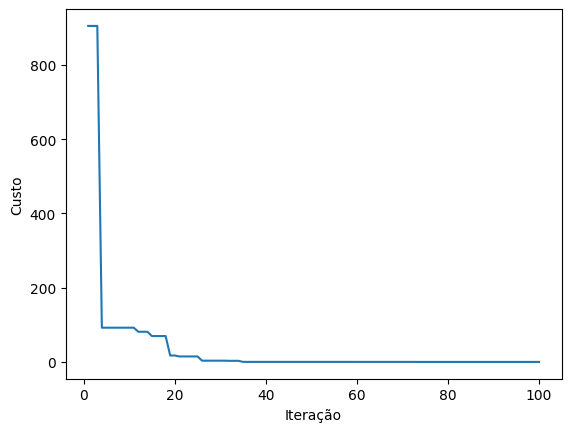

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def Rosenbrock(x):
    """Função Rosenbrock para avaliação do custo."""
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# np.random.seed(42)  # Para reproducibilidade

n_p = 100
dim = 2
Fmax = 500
Fmin = -500
alfa0 = 0.1
alfa1 = 2
beta0 = 0.01
beta1 = 2
T = 100

xi = np.random.rand(n_p, dim) * (Fmax - Fmin) + Fmin
m = np.random.rand(n_p, dim) * (Fmax - Fmin) + Fmin

apditao = []
for per in range(0, n_p):
    apditao.append(Rosenbrock(xi[per, :]))

# Agora, apditao é uma lista que contém os valores calculados durante o loop

#print(apditao)

apditao, poss = np.sort(apditao), np.argsort(apditao)


ind_best = poss[0]
ind_gbest = poss[0]
best, gbest = xi[ind_best, :], xi[ind_best, :]

print(ind_best)

custo = []  # Adicionando uma lista para armazenar os valores do custo ao longo das iterações


for t in range(1, T + 1):
    Td = alfa0 * np.exp(-1 * alfa1 * (t / T) ** alfa1)
    Pp = beta0 * np.log(beta1 * (t / T) ** beta0)
    y = np.random.rand(1, dim) * (Fmax - Fmin) + Fmin

    xi1 = np.empty_like(xi)
    for i in range(n_p):
        r1, r2, r3, r4 = np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()
        if r3 >= 0.5:
            if r4 >= Pp:
                xi1[i, :] = gbest + (Td * (best - y) * r1 + Td * (y - m[i, :]) * r2) * np.sign(np.random.rand() - 0.5)
            else:
                xi1[i, :] = Td * np.random.rand(1, dim) * (Fmax - Fmin) + Fmin
        else:
            xi1[i, :] = gbest - (Td * (best - y) * r1 + Td * (y - m[i, :]) * r2) * np.sign(np.random.rand() - 0.5)


    apditao1 = []
    for per in range(0, n_p):
        apditao1.append(Rosenbrock(xi1[per, :]))

    '''apditao1 = Rosenbrock(xi1)'''
    poss1 = np.argsort(apditao1)
    ind_best1 = poss1[0]

    best = xi1[ind_best1, :]
    if Rosenbrock(best) <= Rosenbrock(gbest):
        gbest = best

    for i in range(n_p):
        apditao_Marjaneh = Rosenbrock(m[i, :])
        if apditao_Marjaneh <= apditao1[i]:
            m[i, :] = xi1[i, :]

    custo.append(Rosenbrock(gbest))
    #print(f"Iteração {t}, Custo: {Rosenbrock(gbest)}")

# Plotagem do resultado
print(gbest)
t = np.arange(1, T + 1)
plt.plot(t, custo)
plt.xlabel('Iteração')
plt.ylabel('Custo')
plt.show()

